# Automated Chest X-ray based Pneumonia Diagnosis using Data Augmentation and VGG19 based Transfer Learning 
The author of this notebook is **Dr Raheel Siddiqi** on *25-08-2019*. He is a *Senior Assistant Professor* at Bahria University, Karachi Campus, Pakistan. His research interests include *Medical Imaging*, *Computer Vision* and *Deep Learning*.

The objective of the experiment (presented in this notebook) is to evaluate the effectiveness of **VGG19** pre-trained model when employed to diagnose Pneumonia (based on Chest X-ray images). The diagnosis process comprises of classifying Chest X-ray images into one of the two classes: (a) Normal, (b) Pneumonia.

The dataset is downloded from [kaggle.com](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). The dataset contains 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

## Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Setting up the Model

In [2]:
from tensorflow.python.keras.applications import VGG19

conv_base=VGG19(weights='imagenet',include_top=False,input_shape=(150,150,3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
filepath="VGG19_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 24,220,226
Trainable params: 24,220,226
Non-trainable params: 0
_________________________________________________________________


## Setting up Training and Validation Data for the experiment

In [6]:
image_height = 150
image_width = 150
batch_size = 8
no_of_epochs  = 100
number_of_training_samples=5216
number_of_validation_samples=16
number_of_test_samples=624

In [7]:
train_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\train'
validation_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\val'
test_dir='D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test'

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_dir,target_size=(image_width, image_height),batch_size=batch_size)
validation_set = validation_datagen.flow_from_directory(validation_dir,target_size=(image_width, image_height),batch_size=batch_size,shuffle=False)
test_set = test_datagen.flow_from_directory(test_dir,target_size=(image_width, image_height),batch_size=batch_size,shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model Training

In [10]:
import math

history = model.fit_generator(
      training_set,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=no_of_epochs,
      callbacks=callbacks_list,
      validation_data=validation_set,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
652/652 [==============================] - 195s 299ms/step - loss: 0.3646 - categorical_accuracy: 0.8330 - val_loss: 0.3877 - val_categorical_accuracy: 0.7500
Epoch 2/100
652/652 [==============================] - 190s 291ms/step - loss: 0.2351 - categorical_accuracy: 0.9036 - val_loss: 1.8386 - val_categorical_accuracy: 0.6250
Epoch 3/100
652/652 [==============================] - 191s 292ms/step - loss: 0.2075 - categorical_accuracy: 0.9139 - val_loss: 0.5643 - val_categorical_accuracy: 0.7500
Epoch 4/100
652/652 [==============================] - 179s 275ms/step - loss: 0.1806 - categorical_accuracy: 0.9275 - val_loss: 1.4939 - val_categorical_accuracy: 0.6250
Epoch 5/100
652/652 [==============================] - 162s 248ms/step - loss: 0.1554 - categorical_accuracy: 0.9427 - val_loss: 1.0051 - val_categorical_accuracy: 0.7500
Epoch 6/100
652/652 [==============================] - 161s 248ms/step - loss: 0.1702 - categoric

652/652 [==============================] - 162s 248ms/step - loss: 0.0598 - categorical_accuracy: 0.9781 - val_loss: 0.1689 - val_categorical_accuracy: 0.9375
Epoch 31/100
652/652 [==============================] - 162s 248ms/step - loss: 0.0628 - categorical_accuracy: 0.9787 - val_loss: 0.5147 - val_categorical_accuracy: 0.8125
Epoch 32/100
652/652 [==============================] - 162s 248ms/step - loss: 0.0722 - categorical_accuracy: 0.9726 - val_loss: 0.1615 - val_categorical_accuracy: 0.9375
Epoch 33/100
652/652 [==============================] - 162s 248ms/step - loss: 0.0656 - categorical_accuracy: 0.9757 - val_loss: 0.4164 - val_categorical_accuracy: 0.8750
Epoch 34/100
652/652 [==============================] - 162s 248ms/step - loss: 0.0700 - categorical_accuracy: 0.9793 - val_loss: 0.0923 - val_categorical_accuracy: 0.9375
Epoch 35/100
652/652 [==============================] - 162s 248ms/step - loss: 0.0572 - categorical_accuracy: 0.9781 - val_loss: 0.0524 - val_categorica

652/652 [==============================] - 174s 267ms/step - loss: 0.0405 - categorical_accuracy: 0.9849 - val_loss: 0.0668 - val_categorical_accuracy: 0.9375
Epoch 61/100
652/652 [==============================] - 175s 268ms/step - loss: 0.0376 - categorical_accuracy: 0.9860 - val_loss: 0.0277 - val_categorical_accuracy: 1.0000
Epoch 62/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0512 - categorical_accuracy: 0.9824 - val_loss: 0.1174 - val_categorical_accuracy: 0.9375
Epoch 63/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0388 - categorical_accuracy: 0.9873 - val_loss: 0.0408 - val_categorical_accuracy: 1.0000
Epoch 64/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0390 - categorical_accuracy: 0.9856 - val_loss: 0.0957 - val_categorical_accuracy: 0.9375
Epoch 65/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0365 - categorical_accuracy: 0.9889 - val_loss: 0.1085 - val_categorica

652/652 [==============================] - 175s 269ms/step - loss: 0.0375 - categorical_accuracy: 0.9870 - val_loss: 0.0380 - val_categorical_accuracy: 1.0000
Epoch 91/100
652/652 [==============================] - 177s 271ms/step - loss: 0.0236 - categorical_accuracy: 0.9914 - val_loss: 0.0532 - val_categorical_accuracy: 0.9375
Epoch 92/100
652/652 [==============================] - 176s 269ms/step - loss: 0.0296 - categorical_accuracy: 0.9898 - val_loss: 1.7393 - val_categorical_accuracy: 0.6250
Epoch 93/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0558 - categorical_accuracy: 0.9801 - val_loss: 0.7419 - val_categorical_accuracy: 0.7500
Epoch 94/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0529 - categorical_accuracy: 0.9797 - val_loss: 0.1867 - val_categorical_accuracy: 0.8750
Epoch 95/100
652/652 [==============================] - 174s 267ms/step - loss: 0.0452 - categorical_accuracy: 0.9847 - val_loss: 0.4023 - val_categorica

## Visualizing the Training Process

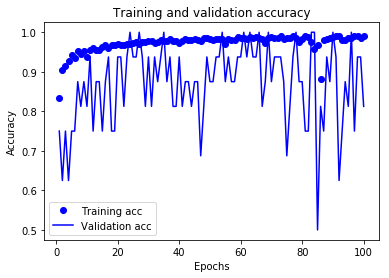

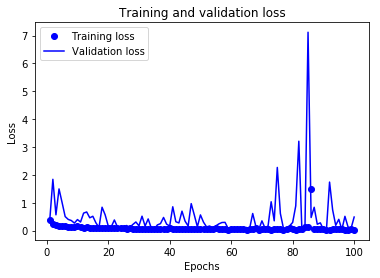

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Loading the Best Model

In [12]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG19_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5')

## Evaluating the Best Model

In [13]:
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_set, steps=steps_test,verbose=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

78/78 [==============================] - 8s 99ms/step - loss: 0.2186 - categorical_accuracy: 0.9375 0s - loss: 0.2232 - categorical_accuracy
Test-set classification accuracy: 93.75%


## Calculating Precision, Specificity and Sensitivity (Recall) values for the model
*Precision-Recall* is a useful measure of success of prediction when the classes are very imbalanced. High *precision* relates to a low false positive rate, and high *recall* relates to a low false negative rate.

Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Recall is defined as the number of true positives over the number of true positives plus the number of false negatives. Please see the [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) for details.

Another way of assessing a binary classification model is to compute the *sensitivity* (also called the true positive rate or the recall) and *specificity* (also called the true negative rate) of the model. *Sensitivity* indicates the percentage of sick people who are correctly identified as having the condition. *Specificity* indicates the percentage of healthy people who are correctly identified as not having the condition.

But first we prepare our test data, so that later we can draw the *confusion matrix* as well as calculate *precision*, *specificity* and *sensitivity (recall)* of the model.

In [14]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

normal_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\NORMAL')
pneumonia_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\chest-xray-pneumonia\\chest_xray\\chest_xray\\test\\PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [15]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 5s 9ms/sample - loss: 0.2096 - categorical_accuracy: 0.9375
Loss on test set:  0.20956307267904498
Accuracy on test set:  0.9375


In [16]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(624,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

624/624 [==============================] - 5s 7ms/sample
(624, 1)
(624, 1)


<Figure size 432x288 with 0 Axes>

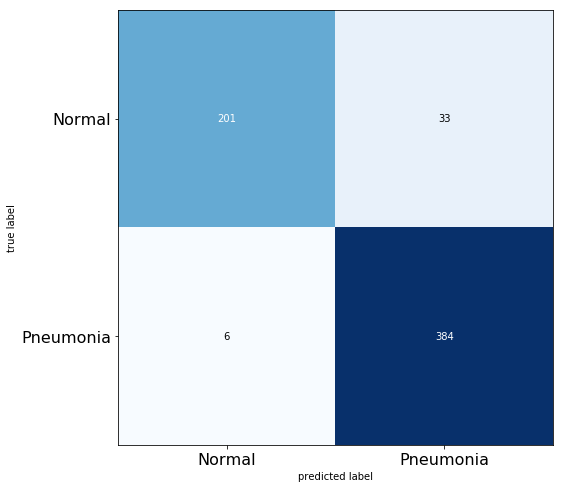

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [18]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall) of the model is {:.3f}".format(recall))
print("Specificity of the model is {:.3f}".format(specificity))
print("Precision of the model is {:.3f}".format(precision))

Sensitivity (Recall) of the model is 0.985
Specificity of the model is 0.859
Precision of the model is 0.921


Nice!!! So, this model has a `98.5%` sensitivity (recall), `85.9%` specificity and `92.1%` precision.

## ROC Curve and AUC for the model
**Receiver operating characteristic** curve (a.k.a ROC) is a graphic plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". **Area Under the Curve** (a.k.a. AUC) is the percentage of the area that is under this ROC curve, ranging between 0 and 1.
ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance. The higher the AUC is, the better the classifier.

In [19]:
from sklearn.metrics import roc_curve

probs = best_model.predict_proba(test_data)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), preds)

In [20]:
from sklearn.metrics import auc
auc_var = auc(fpr, tpr)

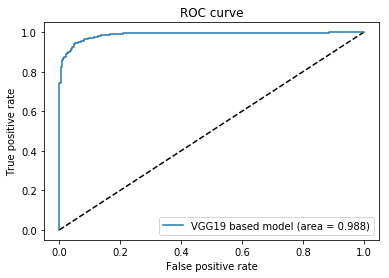

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='VGG19 based model (area = {:.3f})'.format(auc_var))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Precision-Recall Curve for the Model

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [23]:
precision, recall, thresholds = precision_recall_curve(test_labels.ravel(), preds)

In [24]:
auc_var2 = auc(recall, precision)

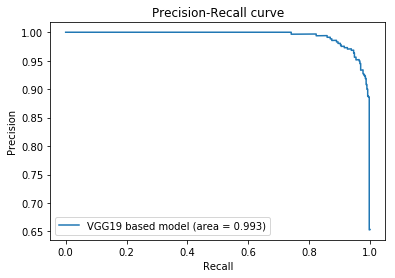

In [25]:
plt.figure()
plt.plot(recall, precision, label='VGG19 based model (area = {:.3f})'.format(auc_var2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

In [26]:
print('Average Precision Score: {:.3f}'.format(average_precision_score(test_labels.ravel(), preds)))

Average Precision Score: 0.993


In [27]:
print("F1 Score: {:.3f}".format(f1_score(test_labels.ravel(),predicted_labels.ravel())))

F1 Score: 0.952
